In [1]:
#Thus  designed  and  implemented  of  Clonal  selection  algorithm  using  Python.

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Define the fitness function
def fitness_function(x):
    return x * np.sin(10 * np.pi * x) + 1.0

# Initialize population
def initialize_population(size):
    return np.random.rand(size)

# Clone selection
def select_top(population, fitness, n_selected):
    indices = np.argsort(fitness)[-n_selected:]
    return population[indices]

# Hypermutation (inversely proportional to fitness)
def hypermutate(clones, fitness, mutation_rate=0.1):
    max_fit = np.max(fitness)
    mutated = []
    for i, clone in enumerate(clones):
        rate = mutation_rate * (1 - fitness[i] / max_fit)
        new_clone = clone + np.random.normal(0, rate)
        new_clone = np.clip(new_clone, 0, 1)  # Ensure within [0, 1]
        mutated.append(new_clone)
    return np.array(mutated)

# Clonal Selection Algorithm
def clonal_selection_algorithm(pop_size=50, generations=100, n_selected=10, n_clones=5):
    population = initialize_population(pop_size)
    best_scores = []

    for gen in range(generations):
        fitness = fitness_function(population)
        best_scores.append(np.max(fitness))

        selected = select_top(population, fitness, n_selected)
        clones = np.repeat(selected, n_clones)

        clone_fitness = fitness_function(clones)
        mutated_clones = hypermutate(clones, clone_fitness)
        mutated_fitness = fitness_function(mutated_clones)

        best_from_clones_indices = np.argsort(mutated_fitness)[-n_selected:]
        best_new = mutated_clones[best_from_clones_indices]

        population = np.concatenate([population, best_new])
        population_fitness = fitness_function(population
        top_indices = np.argsort(population_fitness)[-pop_size:]
        population = population[top_indices]

    best_solution = population[np.argmax(fitness_function(population))]
    return best_solution, best_scores

In [5]:
# Run the algorithm
best, scores = clonal_selection_algorithm()

print("Best solution found:", best)
print("Best fitness:", fitness_function(best))

Best solution found: 0.8487738222150241
Best fitness: 1.8481441494511381


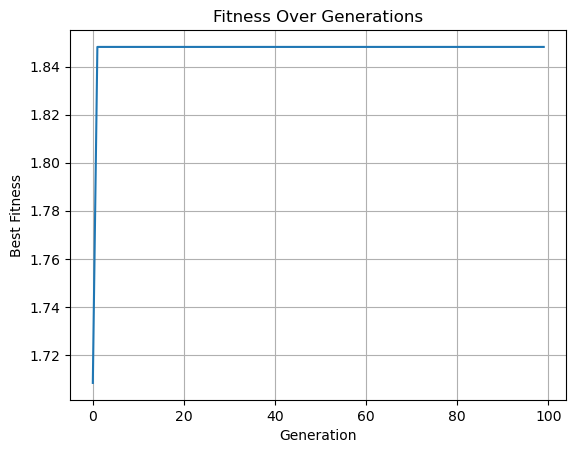

In [7]:
# Plot the convergence
plt.plot(scores)
plt.title("Fitness Over Generations")
plt.xlabel("Generation")
plt.ylabel("Best Fitness")
plt.grid(True)
plt.show()